In [3]:
# Célula 1: Configurar ambiente
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

# Configurar visualizações
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ Ambiente configurado!")

✅ Ambiente configurado!


In [ ]:
import os
import json

# 1. COLOQUE SEUS DADOS AQUI
KAGGLE_USERNAME = "seu_usuario_aqui"  # <--- Mude para o seu username do Kaggle
KAGGLE_KEY = "xxx"

# 2. Criar o diretório .kaggle se não existir
!mkdir -p ~/.kaggle

# 3. Criar o arquivo kaggle.json programaticamente
api_token = {"username": KAGGLE_USERNAME, "key": KAGGLE_KEY}

with open(os.path.expanduser('~/.kaggle/kaggle.json'), 'w') as file:
    json.dump(api_token, file)
s
# 4. Ajustar as permissões de segurança (Obrigatório)
!chmod 600 ~/.kaggle/kaggle.json

print("✅ Arquivo kaggle.json criado e configurado com sucesso!")

# 5. Testar
!kaggle competitions list

✅ Arquivo kaggle.json criado e configurado com sucesso!
401 Client Error: Unauthorized for url: https://www.kaggle.com/api/v1/competitions/list?page=1


In [5]:
# Célula 3: Download do dataset
!kaggle datasets download -d hrishitpatil/flight-data-2024

# Descompactar
!unzip -q flight-data-2024.zip

print("✅ Dataset baixado e descompactado!")

Dataset URL: https://www.kaggle.com/datasets/hrishitpatil/flight-data-2024
License(s): CC0-1.0
100% 270M/270M [00:00<00:00, 588MB/s] 
100% 270M/270M [00:00<00:00, 642MB/s]
✅ Dataset baixado e descompactado!


In [6]:
# Listar arquivos baixados
import os

print("📁 Arquivos disponíveis:")
for file in os.listdir('.'):
    if file.endswith('.csv') or file.endswith('.xlsx') or file.endswith('.parquet'):
        print(f"  • {file}")

# Identificar arquivo principal (pode variar)
flight_files = [f for f in os.listdir('.') if 'flight' in f.lower() and f.endswith('.csv')]
print(f"\n🎯 Arquivos de voos identificados: {flight_files}")

📁 Arquivos disponíveis:
  • flight_data_2024_sample.csv
  • flight_data_2024_data_dictionary.csv
  • flight_data_2024.csv

🎯 Arquivos de voos identificados: ['flight_data_2024_sample.csv', 'flight_data_2024_data_dictionary.csv', 'flight_data_2024.csv']


In [7]:
# Tentar carregar diferentes formatos possíveis
def load_flight_data():
    possible_files = [
        'flight_data_2024.csv',
        'flight_data.csv',
        'flights.csv',
        'flight-delay.csv',
        'dataset.csv'
    ]

    for file in possible_files:
        if os.path.exists(file):
            try:
                print(f"📥 Carregando {file}...")
                df = pd.read_csv(file)
                print(f"✅ Arquivo {file} carregado com sucesso!")
                return df
            except Exception as e:
                print(f"❌ Erro ao carregar {file}: {e}")

    # Se não encontrar, listar CSV disponíveis
    csv_files = [f for f in os.listdir('.') if f.endswith('.csv')]
    print(f"\n📋 CSV disponíveis: {csv_files}")

    # Carregar primeiro CSV disponível
    if csv_files:
        df = pd.read_csv(csv_files[0])
        print(f"📥 Carregado {csv_files[0]} como fallback")
        return df
    else:
        print("❌ Nenhum arquivo CSV encontrado!")
        return None

# Carregar dados
flight_df = load_flight_data()

📥 Carregando flight_data_2024.csv...
✅ Arquivo flight_data_2024.csv carregado com sucesso!


In [8]:
print("=" * 60)
print("📊 DIMENSÕES E ESTRUTURA DO DATASET")
print("=" * 60)

if flight_df is not None:
    # 1. Dimensões
    print(f"\n📈 Dimensões do dataset:")
    print(f"   • Número de linhas: {flight_df.shape[0]:,}")
    print(f"   • Número de colunas: {flight_df.shape[1]}")

    # 2. Primeiras linhas
    print(f"\n👀 Primeiras 10 linhas:")
    display(flight_df.head(10))

    # 3. Últimas linhas
    print(f"\n👁️ Últimas 5 linhas:")
    display(flight_df.tail(5))

    # 4. Tipos de dados
    print(f"\n🔧 Tipos de dados por coluna:")
    dtype_info = flight_df.dtypes.reset_index()
    dtype_info.columns = ['Coluna', 'Tipo de Dado']
    display(dtype_info)

    # 5. Informações completas
    print(f"\n📋 Informações completas do dataset:")
    print("\n" + "="*40)
    flight_df.info()

else:
    print("❌ Dataset não carregado. Verifique os passos anteriores.")

📊 DIMENSÕES E ESTRUTURA DO DATASET

📈 Dimensões do dataset:
   • Número de linhas: 7,079,081
   • Número de colunas: 35

👀 Primeiras 10 linhas:


,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_nm,...,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2024,1,1,1,2024-01-01,9E,4814.0,JFK,"New York, NY",New York,...,0,136.0,122.0,84.0,509.0,0,0,0,0,0
1,2024,1,1,1,2024-01-01,9E,4815.0,MSP,"Minneapolis, MN",Minnesota,...,0,130.0,114.0,88.0,622.0,0,0,0,0,0
2,2024,1,1,1,2024-01-01,9E,4817.0,JFK,"New York, NY",New York,...,0,106.0,90.0,61.0,288.0,0,0,0,0,0
3,2024,1,1,1,2024-01-01,9E,4817.0,RIC,"Richmond, VA",Virginia,...,0,111.0,76.0,51.0,288.0,0,0,0,0,0
4,2024,1,1,1,2024-01-01,9E,4818.0,DTW,"Detroit, MI",Michigan,...,0,79.0,70.0,45.0,237.0,0,0,0,0,0
5,2024,1,1,1,2024-01-01,9E,4822.0,JAX,"Jacksonville, FL",Florida,...,0,137.0,120.0,102.0,833.0,0,0,0,0,0
6,2024,1,1,1,2024-01-01,9E,4822.0,LGA,"New York, NY",New York,...,0,169.0,164.0,125.0,833.0,0,0,0,0,0
7,2024,1,1,1,2024-01-01,9E,4823.0,CHS,"Charleston, SC",South Carolina,...,0,118.0,99.0,86.0,641.0,0,0,0,0,0
8,2024,1,1,1,2024-01-01,9E,4823.0,LGA,"New York, NY",New York,...,0,149.0,123.0,101.0,641.0,0,0,0,0,0
9,2024,1,1,1,2024-01-01,9E,4828.0,ITH,"Ithaca/Cortland, NY",New York,...,0,79.0,67.0,43.0,189.0,0,0,0,0,0



👁️ Últimas 5 linhas:


,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_nm,...,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
7079076,2024,12,31,2,2024-12-31,YX,5857.0,MYR,"Myrtle Beach, SC",South Carolina,...,0,117.0,102.0,76.0,563.0,0,0,0,0,0
7079077,2024,12,31,2,2024-12-31,YX,5859.0,JFK,"New York, NY",New York,...,0,89.0,72.0,51.0,273.0,0,0,0,0,0
7079078,2024,12,31,2,2024-12-31,YX,5859.0,PWM,"Portland, ME",Maine,...,0,89.0,83.0,50.0,273.0,0,0,0,0,0
7079079,2024,12,31,2,2024-12-31,YX,5862.0,JFK,"New York, NY",New York,...,0,89.0,81.0,42.0,209.0,0,0,0,0,0
7079080,2024,12,31,2,2024-12-31,YX,5863.0,SYR,"Syracuse, NY",New York,...,0,83.0,72.0,47.0,209.0,0,0,0,0,0



🔧 Tipos de dados por coluna:


,Coluna,Tipo de Dado
0,year,int64
1,month,int64
2,day_of_month,int64
3,day_of_week,int64
4,fl_date,object
5,op_unique_carrier,object
6,op_carrier_fl_num,float64
7,origin,object
8,origin_city_name,object
9,origin_state_nm,object



📋 Informações completas do dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7079081 entries, 0 to 7079080
Data columns (total 35 columns):
 #   Column               Dtype  
---  ------               -----  
 0   year                 int64  
 1   month                int64  
 2   day_of_month         int64  
 3   day_of_week          int64  
 4   fl_date              object 
 5   op_unique_carrier    object 
 6   op_carrier_fl_num    float64
 7   origin               object 
 8   origin_city_name     object 
 9   origin_state_nm      object 
 10  dest                 object 
 11  dest_city_name       object 
 12  dest_state_nm        object 
 13  crs_dep_time         int64  
 14  dep_time             float64
 15  dep_delay            float64
 16  taxi_out             float64
 17  wheels_off           float64
 18  wheels_on            float64
 19  taxi_in              float64
 20  crs_arr_time         int64  
 21  arr_time             float64
 22  arr_delay            float64

##🔍 SUBTAREFA 1: CARREGAMENTO E PRIMEIRAS IMPRESSÕES
###Célula 6: Dimensões e estrutura básica

In [9]:
print("=" * 60)
print("🏷️ NOMES DAS COLUNAS E DESCRIÇÃO")
print("=" * 60)

if flight_df is not None:
    print(f"\n📝 Lista completa de colunas ({len(flight_df.columns)} total):")
    for i, col in enumerate(flight_df.columns, 1):
        print(f"  {i:2d}. {col}")

    print(f"\n📄 Estatísticas descritivas (numéricas):")
    display(flight_df.describe().T)

    print(f"\n📄 Estatísticas descritivas (categóricas):")
    categorical_cols = flight_df.select_dtypes(include=['object']).columns
    if len(categorical_cols) > 0:
        for col in categorical_cols[:5]:  # Mostrar primeiras 5 categóricas
            print(f"\n📌 Coluna: {col}")
            print(f"   Valores únicos: {flight_df[col].nunique()}")
            print(f"   Top 5 valores mais frequentes:")
            display(flight_df[col].value_counts().head())
    else:
        print("   Nenhuma coluna categórica encontrada.")

🏷️ NOMES DAS COLUNAS E DESCRIÇÃO

📝 Lista completa de colunas (35 total):
   1. year
   2. month
   3. day_of_month
   4. day_of_week
   5. fl_date
   6. op_unique_carrier
   7. op_carrier_fl_num
   8. origin
   9. origin_city_name
  10. origin_state_nm
  11. dest
  12. dest_city_name
  13. dest_state_nm
  14. crs_dep_time
  15. dep_time
  16. dep_delay
  17. taxi_out
  18. wheels_off
  19. wheels_on
  20. taxi_in
  21. crs_arr_time
  22. arr_time
  23. arr_delay
  24. cancelled
  25. cancellation_code
  26. diverted
  27. crs_elapsed_time
  28. actual_elapsed_time
  29. air_time
  30. distance
  31. carrier_delay
  32. weather_delay
  33. nas_delay
  34. security_delay
  35. late_aircraft_delay

📄 Estatísticas descritivas (numéricas):


,count,mean,std,min,25%,50%,75%,max
year,7079081.0,2024.000000,0.000000,2024.0,2024.0,2024.0,2024.0,2024.0
month,7079081.0,6.584868,3.396806,1.0,4.0,7.0,10.0,12.0
day_of_month,7079081.0,15.784451,8.786433,1.0,8.0,16.0,23.0,31.0
day_of_week,7079081.0,3.981945,2.012279,1.0,2.0,4.0,6.0,7.0
op_carrier_fl_num,7079080.0,2504.622501,1652.252505,1.0,1151.0,2227.0,3717.0,8819.0
crs_dep_time,7079081.0,1327.299824,493.030621,1.0,905.0,1320.0,1736.0,2400.0
dep_time,6986422.0,1330.765191,509.477907,1.0,908.0,1325.0,1746.0,2400.0
dep_delay,6986111.0,12.677082,56.059970,-96.0,-6.0,-2.0,9.0,3777.0
taxi_out,6983347.0,17.904450,9.677410,1.0,12.0,15.0,21.0,214.0
wheels_off,6983347.0,1353.541910,512.047456,1.0,924.0,1338.0,1801.0,2400.0



📄 Estatísticas descritivas (categóricas):

📌 Coluna: fl_date
   Valores únicos: 366
   Top 5 valores mais frequentes:


,count
fl_date,
2024-12-01,21764
2024-10-11,21548
2024-10-10,21539
2024-10-14,21502
2024-10-17,21496



📌 Coluna: op_unique_carrier
   Valores únicos: 15
   Top 5 valores mais frequentes:


,count
op_unique_carrier,
WN,1419419
DL,1009194
AA,984306
UA,760451
OO,744658



📌 Coluna: origin
   Valores únicos: 348
   Top 5 valores mais frequentes:


,count
origin,
ATL,341910
DFW,313582
DEN,308645
ORD,280052
CLT,217574



📌 Coluna: origin_city_name
   Valores únicos: 342
   Top 5 valores mais frequentes:


,count
origin_city_name,
"Chicago, IL",359685
"Atlanta, GA",341910
"Dallas/Fort Worth, TX",313582
"Denver, CO",308645
"New York, NY",285780



📌 Coluna: origin_state_nm
   Valores únicos: 52
   Top 5 valores mais frequentes:


,count
origin_state_nm,
Texas,751839
California,741984
Florida,629206
Illinois,373672
Georgia,368394


### Célula 7: Nomes das colunas e descrição


In [10]:
print("=" * 60)
print("🏷️ NOMES DAS COLUNAS E DESCRIÇÃO")
print("=" * 60)

if flight_df is not None:
    print(f"\n📝 Lista completa de colunas ({len(flight_df.columns)} total):")
    for i, col in enumerate(flight_df.columns, 1):
        print(f"  {i:2d}. {col}")

    print(f"\n📄 Estatísticas descritivas (numéricas):")
    display(flight_df.describe().T)

    print(f"\n📄 Estatísticas descritivas (categóricas):")
    categorical_cols = flight_df.select_dtypes(include=['object']).columns
    if len(categorical_cols) > 0:
        for col in categorical_cols[:5]:  # Mostrar primeiras 5 categóricas
            print(f"\n📌 Coluna: {col}")
            print(f"   Valores únicos: {flight_df[col].nunique()}")
            print(f"   Top 5 valores mais frequentes:")
            display(flight_df[col].value_counts().head())
    else:
        print("   Nenhuma coluna categórica encontrada.")

🏷️ NOMES DAS COLUNAS E DESCRIÇÃO

📝 Lista completa de colunas (35 total):
   1. year
   2. month
   3. day_of_month
   4. day_of_week
   5. fl_date
   6. op_unique_carrier
   7. op_carrier_fl_num
   8. origin
   9. origin_city_name
  10. origin_state_nm
  11. dest
  12. dest_city_name
  13. dest_state_nm
  14. crs_dep_time
  15. dep_time
  16. dep_delay
  17. taxi_out
  18. wheels_off
  19. wheels_on
  20. taxi_in
  21. crs_arr_time
  22. arr_time
  23. arr_delay
  24. cancelled
  25. cancellation_code
  26. diverted
  27. crs_elapsed_time
  28. actual_elapsed_time
  29. air_time
  30. distance
  31. carrier_delay
  32. weather_delay
  33. nas_delay
  34. security_delay
  35. late_aircraft_delay

📄 Estatísticas descritivas (numéricas):


,count,mean,std,min,25%,50%,75%,max
year,7079081.0,2024.000000,0.000000,2024.0,2024.0,2024.0,2024.0,2024.0
month,7079081.0,6.584868,3.396806,1.0,4.0,7.0,10.0,12.0
day_of_month,7079081.0,15.784451,8.786433,1.0,8.0,16.0,23.0,31.0
day_of_week,7079081.0,3.981945,2.012279,1.0,2.0,4.0,6.0,7.0
op_carrier_fl_num,7079080.0,2504.622501,1652.252505,1.0,1151.0,2227.0,3717.0,8819.0
crs_dep_time,7079081.0,1327.299824,493.030621,1.0,905.0,1320.0,1736.0,2400.0
dep_time,6986422.0,1330.765191,509.477907,1.0,908.0,1325.0,1746.0,2400.0
dep_delay,6986111.0,12.677082,56.059970,-96.0,-6.0,-2.0,9.0,3777.0
taxi_out,6983347.0,17.904450,9.677410,1.0,12.0,15.0,21.0,214.0
wheels_off,6983347.0,1353.541910,512.047456,1.0,924.0,1338.0,1801.0,2400.0



📄 Estatísticas descritivas (categóricas):

📌 Coluna: fl_date
   Valores únicos: 366
   Top 5 valores mais frequentes:


,count
fl_date,
2024-12-01,21764
2024-10-11,21548
2024-10-10,21539
2024-10-14,21502
2024-10-17,21496



📌 Coluna: op_unique_carrier
   Valores únicos: 15
   Top 5 valores mais frequentes:


,count
op_unique_carrier,
WN,1419419
DL,1009194
AA,984306
UA,760451
OO,744658



📌 Coluna: origin
   Valores únicos: 348
   Top 5 valores mais frequentes:


,count
origin,
ATL,341910
DFW,313582
DEN,308645
ORD,280052
CLT,217574



📌 Coluna: origin_city_name
   Valores únicos: 342
   Top 5 valores mais frequentes:


,count
origin_city_name,
"Chicago, IL",359685
"Atlanta, GA",341910
"Dallas/Fort Worth, TX",313582
"Denver, CO",308645
"New York, NY",285780



📌 Coluna: origin_state_nm
   Valores únicos: 52
   Top 5 valores mais frequentes:


,count
origin_state_nm,
Texas,751839
California,741984
Florida,629206
Illinois,373672
Georgia,368394


## 🎯 SUBTAREFA 2: AVALIAÇÃO DE VALORES AUSENTES
### Célula 8: Análise de valores nulos

🔍 ANÁLISE DE VALORES AUSENTES (MISSING VALUES)

📊 Visão geral:
   • Total de células: 247,767,835
   • Valores nulos totais: 7,994,873
   • Porcentagem de nulos: 3.23%

🚨 Colunas com valores nulos:


,Coluna,Valores Nulos,% Nulos
9,cancellation_code,6982766,98.64
12,air_time,113814,1.61
11,actual_elapsed_time,113814,1.61
8,arr_delay,113814,1.61
7,arr_time,97854,1.38
5,wheels_on,97856,1.38
6,taxi_in,97856,1.38
4,wheels_off,95734,1.35
3,taxi_out,95734,1.35
2,dep_delay,92970,1.31


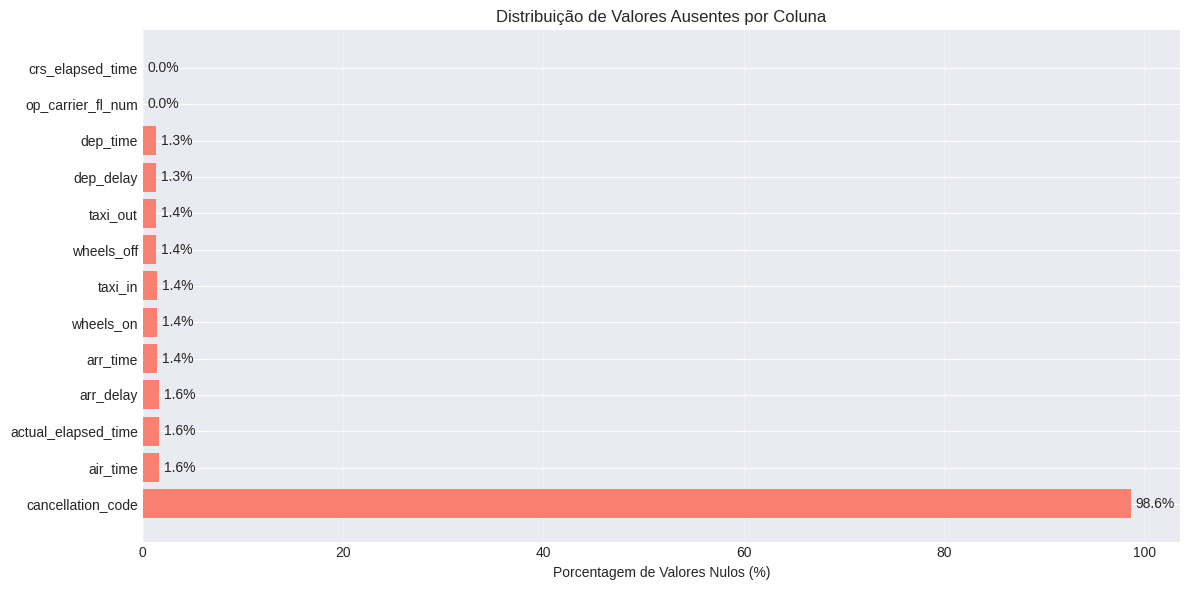


🔎 Padrões de valores nulos:
   • Linhas completamente nulas: 0
   • Colunas completamente nulas: 0


In [11]:
print("=" * 60)
print("🔍 ANÁLISE DE VALORES AUSENTES (MISSING VALUES)")
print("=" * 60)

if flight_df is not None:
    # 1. Valores nulos totais
    total_nulls = flight_df.isnull().sum().sum()
    total_cells = flight_df.shape[0] * flight_df.shape[1]
    null_percentage = (total_nulls / total_cells) * 100

    print(f"\n📊 Visão geral:")
    print(f"   • Total de células: {total_cells:,}")
    print(f"   • Valores nulos totais: {total_nulls:,}")
    print(f"   • Porcentagem de nulos: {null_percentage:.2f}%")

    # 2. Nulos por coluna
    nulls_by_column = flight_df.isnull().sum()
    nulls_by_column = nulls_by_column[nulls_by_column > 0]

    if len(nulls_by_column) > 0:
        print(f"\n🚨 Colunas com valores nulos:")
        null_df = pd.DataFrame({
            'Coluna': nulls_by_column.index,
            'Valores Nulos': nulls_by_column.values,
            '% Nulos': (nulls_by_column.values / flight_df.shape[0] * 100).round(2)
        }).sort_values('% Nulos', ascending=False)

        display(null_df)

        # 3. Visualização
        plt.figure(figsize=(12, 6))
        bars = plt.barh(null_df['Coluna'], null_df['% Nulos'], color='salmon')
        plt.xlabel('Porcentagem de Valores Nulos (%)')
        plt.title('Distribuição de Valores Ausentes por Coluna')
        plt.grid(axis='x', alpha=0.3)

        # Adicionar valores nas barras
        for bar in bars:
            width = bar.get_width()
            plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
                    f'{width:.1f}%', va='center')

        plt.tight_layout()
        plt.show()
    else:
        print("✅ Nenhum valor nulo encontrado no dataset!")

    # 4. Padrões de nulos
    print(f"\n🔎 Padrões de valores nulos:")
    print(f"   • Linhas completamente nulas: {flight_df.isnull().all(axis=1).sum()}")
    print(f"   • Colunas completamente nulas: {flight_df.isnull().all(axis=0).sum()}")

    # 5. Matriz de nulos (para datasets menores)
    if flight_df.shape[0] < 10000:
        print(f"\n🧩 Matriz de valores nulos (amostra de 1000 linhas):")
        plt.figure(figsize=(15, 6))
        sns.heatmap(flight_df.head(1000).isnull(),
                   cbar_kws={'label': 'Valor Ausente'},
                   cmap='viridis')
        plt.title('Mapa de Calor de Valores Ausentes (Primeiras 1000 linhas)')
        plt.tight_layout()
        plt.show()

## 🎯 SUBTAREFA 3: DETECÇÃO DE DUPLICATAS
### Célula 9: Identificação de registros duplicados

In [12]:
print("=" * 60)
print("🔍 DETECÇÃO DE REGISTROS DUPLICADOS")
print("=" * 60)

if flight_df is not None:
    # 1. Duplicatas completas
    complete_duplicates = flight_df.duplicated().sum()
    duplicate_percentage = (complete_duplicates / flight_df.shape[0]) * 100

    print(f"\n📊 Duplicatas completas:")
    print(f"   • Registros duplicados: {complete_duplicates:,}")
    print(f"   • Porcentagem: {duplicate_percentage:.2f}%")

    if complete_duplicates > 0:
        print(f"\n👁️ Exemplo de registros duplicados:")
        duplicate_rows = flight_df[flight_df.duplicated(keep=False)]
        display(duplicate_rows.head(10))

        # Visualização
        labels = ['Únicos', 'Duplicados']
        sizes = [flight_df.shape[0] - complete_duplicates, complete_duplicates]
        colors = ['#66b3ff', '#ff9999']

        plt.figure(figsize=(8, 6))
        plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
        plt.title('Distribuição: Registros Únicos vs Duplicados')
        plt.axis('equal')
        plt.show()

    # 2. Duplicatas parciais (baseado em chaves prováveis)
    print(f"\n🔎 Duplicatas parciais (chaves candidatas):")

    # Identificar possíveis chaves únicas
    possible_keys = []
    for col in ['flight_id', 'flight_number', 'tail_number',
                'flight_key', 'id', 'flight_code']:
        if col in flight_df.columns:
            unique_count = flight_df[col].nunique()
            duplicate_count = flight_df.shape[0] - unique_count
            if duplicate_count > 0:
                possible_keys.append((col, unique_count, duplicate_count))

    if possible_keys:
        print("   Colunas que deveriam ser únicas mas têm duplicatas:")
        for col, unique, dup in possible_keys:
            print(f"   • {col}: {unique:,} únicos, {dup:,} duplicados")
    else:
        print("   ✅ Nenhuma coluna identificada como chave única candidata com duplicatas.")

    # 3. Identificar combinações que podem ser duplicatas
    print(f"\n🔍 Verificando combinações comuns para duplicatas:")

    # Verificar combinações comuns em dados de voo
    combo_columns = []
    for combo in [['airline', 'flight_number', 'departure_time'],
                  ['origin', 'destination', 'departure_date'],
                  ['flight_number', 'departure_date']]:
        existing_cols = [c for c in combo if c in flight_df.columns]
        if len(existing_cols) >= 2:
            combo_columns.append(existing_cols)

    for combo in combo_columns[:3]:  # Verificar apenas 3 combinações
        duplicates = flight_df.duplicated(subset=combo, keep=False).sum()
        if duplicates > 0:
            print(f"   • Combo {combo}: {duplicates:,} potenciais duplicatas")

🔍 DETECÇÃO DE REGISTROS DUPLICADOS

📊 Duplicatas completas:
   • Registros duplicados: 0
   • Porcentagem: 0.00%

🔎 Duplicatas parciais (chaves candidatas):
   ✅ Nenhuma coluna identificada como chave única candidata com duplicatas.

🔍 Verificando combinações comuns para duplicatas:


## 📋 SUBTAREFA 4: RESUMO ESTATÍSTICO INICIAL
### Célula 10: Análise estatística detalhada

📈 RESUMO ESTATÍSTICO INICIAL

🏷️ Classificação das colunas:
   • Numéricas: 26 colunas
   • Categóricas: 9 colunas
   • Datas/Tempo: 8 colunas

📊 Estatísticas detalhadas - Colunas numéricas:


,Tipo,Média,Mediana,Desvio Padrão,Min,Max,Ausentes,Zeros,Únicos
year,int64,2024.00,2024.00,0.00,2024.00,2024.00,0,0,1
month,int64,6.58,7.00,3.40,1.00,12.00,0,0,12
day_of_month,int64,15.78,16.00,8.79,1.00,31.00,0,0,31
day_of_week,int64,3.98,4.00,2.01,1.00,7.00,0,0,7
op_carrier_fl_num,float64,2504.62,2227.00,1652.25,1.00,8819.00,1,0,6862
crs_dep_time,int64,1327.30,1320.00,493.03,1.00,2400.00,0,0,1363
dep_time,float64,1330.77,1325.00,509.48,1.00,2400.00,92659,0,1440
dep_delay,float64,12.68,-2.00,56.06,-96.00,3777.00,92970,303225,1862
taxi_out,float64,17.90,15.00,9.68,1.00,214.00,95734,0,190
wheels_off,float64,1353.54,1338.00,512.05,1.00,2400.00,95734,0,1440



📈 Distribuição das variáveis numéricas:


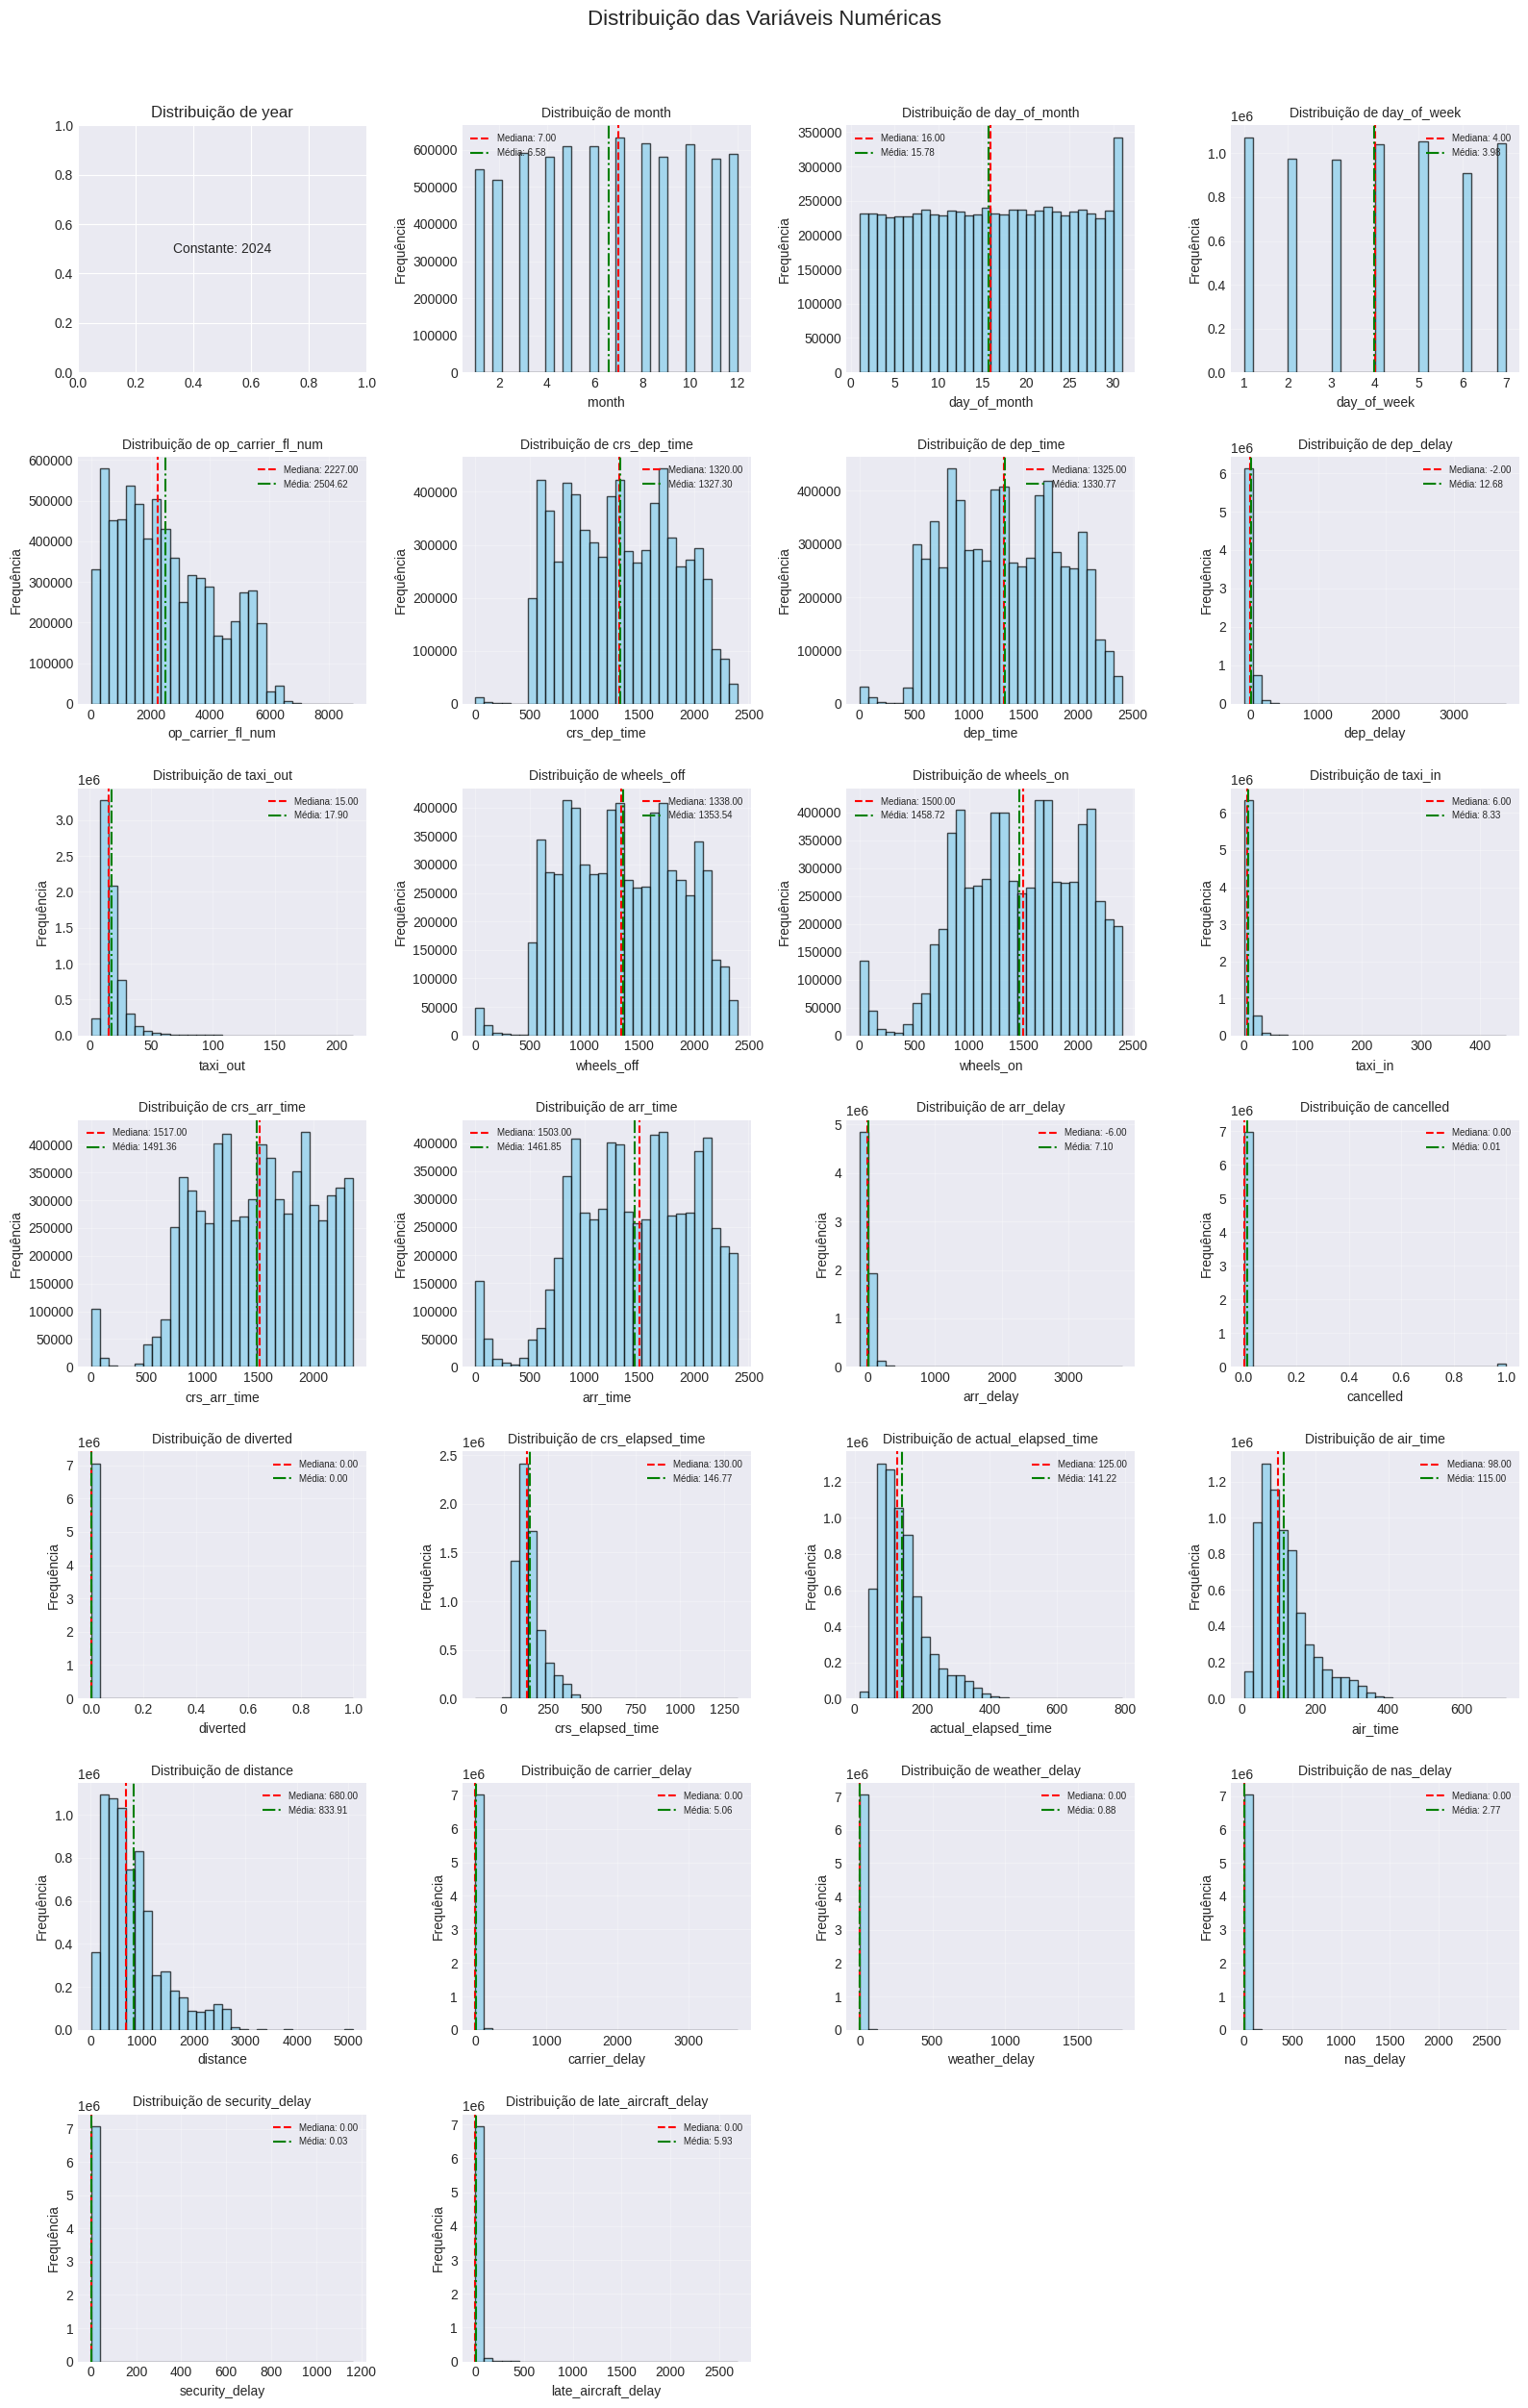

In [13]:
print("=" * 60)
print("📈 RESUMO ESTATÍSTICO INICIAL")
print("=" * 60)

if 'flight_df' in locals() and flight_df is not None:
    # 1. Separar colunas numéricas e categóricas
    numeric_cols = flight_df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = flight_df.select_dtypes(include=['object', 'category']).columns.tolist()
    date_cols = [col for col in flight_df.columns if 'date' in col.lower() or 'time' in col.lower()]

    print(f"\n🏷️ Classificação das colunas:")
    print(f"   • Numéricas: {len(numeric_cols)} colunas")
    print(f"   • Categóricas: {len(categorical_cols)} colunas")
    print(f"   • Datas/Tempo: {len(date_cols)} colunas")

    # 2. Estatísticas detalhadas para numéricas
    if numeric_cols:
        print(f"\n📊 Estatísticas detalhadas - Colunas numéricas:")

        stats_df = pd.DataFrame(index=numeric_cols, columns=[
            'Tipo', 'Média', 'Mediana', 'Desvio Padrão',
            'Min', 'Max', 'Ausentes', 'Zeros', 'Únicos'
        ])

        for col in numeric_cols:
            stats_df.loc[col, 'Tipo'] = str(flight_df[col].dtype)
            stats_df.loc[col, 'Média'] = flight_df[col].mean()
            stats_df.loc[col, 'Mediana'] = flight_df[col].median()
            stats_df.loc[col, 'Desvio Padrão'] = flight_df[col].std()
            stats_df.loc[col, 'Min'] = flight_df[col].min()
            stats_df.loc[col, 'Max'] = flight_df[col].max()
            stats_df.loc[col, 'Ausentes'] = flight_df[col].isnull().sum()
            stats_df.loc[col, 'Zeros'] = (flight_df[col] == 0).sum()
            stats_df.loc[col, 'Únicos'] = flight_df[col].nunique()

        # Formatar para melhor visualização (Correção do SyntaxError aqui)
        display(stats_df.style.format({
            'Média': '{:.2f}',
            'Mediana': '{:.2f}',
            'Desvio Padrão': '{:.2f}',
            'Min': '{:.2f}',
            'Max': '{:.2f}',
            'Ausentes': '{:.0f}',
            'Zeros': '{:.0f}',
            'Únicos': '{:.0f}'
        }).background_gradient(subset=['Ausentes'], cmap='Reds'))

    # 3. Distribuição de variáveis numéricas (histogramas)
    if numeric_cols:
        print(f"\n📈 Distribuição das variáveis numéricas:")

        n_cols = min(4, len(numeric_cols))
        n_rows = int(np.ceil(len(numeric_cols) / n_cols))

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 3.5))

        # Garantir que axes seja sempre uma lista, mesmo com apenas 1 gráfico
        if n_rows == 1 and n_cols == 1:
            axes = [axes]
        else:
            axes = axes.flatten()

        for idx, col in enumerate(numeric_cols):
            ax = axes[idx]
            if flight_df[col].nunique() > 1:  # Evitar erros com constantes
                ax.hist(flight_df[col].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
                ax.set_title(f'Distribuição de {col}', fontsize=10)
                ax.set_xlabel(col)
                ax.set_ylabel('Frequência')
                ax.grid(alpha=0.3)

                # Adicionar linhas de média e mediana
                median = flight_df[col].median()
                mean = flight_df[col].mean()
                ax.axvline(median, color='red', linestyle='--', label=f'Mediana: {median:.2f}')
                ax.axvline(mean, color='green', linestyle='-.', label=f'Média: {mean:.2f}')
                ax.legend(fontsize=7)
            else:
                ax.text(0.5, 0.5, f'Constante: {flight_df[col].iloc[0]}',
                        ha='center', va='center', transform=ax.transAxes)
                ax.set_title(f'Distribuição de {col}')

        # Ocultar eixos não utilizados (subplots vazios)
        for idx in range(len(numeric_cols), len(axes)):
            axes[idx].set_visible(False)

        plt.suptitle('Distribuição das Variáveis Numéricas', fontsize=16, y=1.02)
        plt.tight_layout()
        plt.show()
else:
    print("❌ Erro: O DataFrame 'flight_df' não foi encontrado ou está vazio.")

## 📄 RELATÓRIO FINAL DE INSIGHTS
### Célula 11: Gerar relatório consolidado

In [14]:
print("=" * 60)
print("📋 RELATÓRIO DE ANÁLISE INICIAL - FLIGHT DATA 2024")
print("=" * 60)

if flight_df is not None:
    # Criar dicionário com insights
    insights = {
        'dataset_info': {
            'nome': 'Flight Data 2024',
            'linhas': flight_df.shape[0],
            'colunas': flight_df.shape[1],
            'tamanho_memoria': f"{flight_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB"
        },
        'missing_data': {
            'total_nulos': int(flight_df.isnull().sum().sum()),
            'porcentagem_nulos': f"{(flight_df.isnull().sum().sum() / (flight_df.shape[0] * flight_df.shape[1]) * 100):.2f}%",
            'colunas_com_nulos': int((flight_df.isnull().sum() > 0).sum()),
            'coluna_mais_nulos': flight_df.isnull().sum().idxmax() if flight_df.isnull().sum().max() > 0 else 'Nenhuma'
        },
        'duplicate_data': {
            'duplicatas_completas': int(flight_df.duplicated().sum()),
            'porcentagem_duplicatas': f"{(flight_df.duplicated().sum() / flight_df.shape[0] * 100):.2f}%"
        },
        'data_types': {
            'numeric_cols': len(flight_df.select_dtypes(include=[np.number]).columns),
            'categorical_cols': len(flight_df.select_dtypes(include=['object']).columns),
            'datetime_cols': len([col for col in flight_df.columns if 'date' in col.lower() or 'time' in col.lower()])
        }
    }

    # Exibir relatório formatado
    print("\n" + "📊 RESUMO EXECUTIVO".center(60))
    print("-" * 60)

    for section, data in insights.items():
        if section == 'dataset_info':
            print("\n🌐 INFORMAÇÕES GERAIS DO DATASET:")
            for key, value in data.items():
                print(f"   • {key.replace('_', ' ').title()}: {value}")

        elif section == 'missing_data':
            print("\n⚠️  DADOS AUSENTES (MISSING VALUES):")
            for key, value in data.items():
                print(f"   • {key.replace('_', ' ').title()}: {value}")

        elif section == 'duplicate_data':
            print("\n🔍 DADOS DUPLICADOS:")
            for key, value in data.items():
                print(f"   • {key.replace('_', ' ').title()}: {value}")

        elif section == 'data_types':
            print("\n🔧 TIPOS DE DADOS:")
            for key, value in data.items():
                print(f"   • {key.replace('_', ' ').title()}: {value}")

    print("\n" + "🎯 PRÓXIMOS PASSOS RECOMENDADOS".center(60))
    print("-" * 60)

    # Recomendações baseadas na análise
    recommendations = []

    if insights['missing_data']['total_nulos'] > 0:
        recommendations.append("1. Implementar estratégia para tratar valores ausentes")

    if insights['duplicate_data']['duplicatas_completas'] > 0:
        recommendations.append("2. Remover ou consolidar registros duplicados")

    if insights['data_types']['categorical_cols'] > 10:
        recommendations.append("3. Analisar cardinalidade de colunas categóricas")

    recommendations.extend([
        "4. Identificar variável alvo (atraso) e suas características",
        "5. Preparar dados para feature engineering",
        "6. Validar consistência temporal (se houver datas)"
    ])

    for rec in recommendations:
        print(f"   • {rec}")

    print("\n" + "📈 METAS PARA PRÓXIMA ETAPA".center(60))
    print("-" * 60)
    print("   • Dataset limpo e pré-processado")
    print("   • Documentação de decisões de tratamento")
    print("   • Insights iniciais para modelagem")

📋 RELATÓRIO DE ANÁLISE INICIAL - FLIGHT DATA 2024

                     📊 RESUMO EXECUTIVO                     
------------------------------------------------------------

🌐 INFORMAÇÕES GERAIS DO DATASET:
   • Nome: Flight Data 2024
   • Linhas: 7079081
   • Colunas: 35
   • Tamanho Memoria: 4676.93 MB

⚠️  DADOS AUSENTES (MISSING VALUES):
   • Total Nulos: 7994873
   • Porcentagem Nulos: 3.23%
   • Colunas Com Nulos: 13
   • Coluna Mais Nulos: cancellation_code

🔍 DADOS DUPLICADOS:
   • Duplicatas Completas: 0
   • Porcentagem Duplicatas: 0.00%

🔧 TIPOS DE DADOS:
   • Numeric Cols: 26
   • Categorical Cols: 9
   • Datetime Cols: 8

               🎯 PRÓXIMOS PASSOS RECOMENDADOS               
------------------------------------------------------------
   • 1. Implementar estratégia para tratar valores ausentes
   • 4. Identificar variável alvo (atraso) e suas características
   • 5. Preparar dados para feature engineering
   • 6. Validar consistência temporal (se houver datas)

    

### 💾 Célula 12: Salvar resultados intermediários


In [15]:
print("=" * 60)
print("💾 SALVANDO RESULTADOS DA ANÁLISE")
print("=" * 60)

# Criar diretório para resultados
!mkdir -p analysis_results

# Salvar dataframe limpo (sem duplicatas)
if flight_df is not None:
    # Remover duplicatas completas
    df_clean = flight_df.drop_duplicates()
    df_clean.to_csv('analysis_results/flight_data_cleaned.csv', index=False)
    print(f"✅ Dataset limpo salvo: {df_clean.shape[0]} linhas, {df_clean.shape[1]} colunas")

# Salvar relatório de missing values
missing_report = flight_df.isnull().sum().reset_index()
missing_report.columns = ['coluna', 'valores_ausentes']
missing_report['porcentagem'] = (missing_report['valores_ausentes'] / flight_df.shape[0] * 100).round(2)
missing_report.to_csv('analysis_results/missing_values_report.csv', index=False)
print("✅ Relatório de valores ausentes salvo")

# Salvar informações do dataset
with open('analysis_results/dataset_info.txt', 'w') as f:
    f.write(f"Dataset: Flight Data 2024\n")
    f.write(f"Linhas: {flight_df.shape[0]}\n")
    f.write(f"Colunas: {flight_df.shape[1]}\n")
    f.write(f"Memória usada: {flight_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB\n")
    f.write(f"Valores ausentes: {flight_df.isnull().sum().sum()}\n")
    f.write(f"Duplicatas: {flight_df.duplicated().sum()}\n")

print("✅ Informações do dataset salvas")

# Listar arquivos salvos
print(f"\n📁 Arquivos salvos em 'analysis_results/':")
for file in os.listdir('analysis_results'):
    print(f"   • {file}")

💾 SALVANDO RESULTADOS DA ANÁLISE
✅ Dataset limpo salvo: 7079081 linhas, 35 colunas
✅ Relatório de valores ausentes salvo
✅ Informações do dataset salvas

📁 Arquivos salvos em 'analysis_results/':
   • missing_values_report.csv
   • dataset_info.txt
   • flight_data_cleaned.csv


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 📧 Célula Final: Template de Entrega


In [18]:
print("=" * 60)
print("📬 TEMPLATE DE ENTREGA PARA REVISÃO")
print("=" * 60)

print(f"""
✅ TAREFA CONCLUÍDA POR: @ananda.matos
📅 DATA: {pd.Timestamp.now().strftime('%d/%m/%Y %H:%M')}
📊 DATASET: Flight Data 2024 (Kaggle)

🎯 OBJETIVOS ATINGIDOS:
  1. ✓ Carregamento do dataset completo
  2. ✓ Análise de dimensões e estrutura
  3. ✓ Identificação de valores ausentes
  4. ✓ Detecção de duplicatas
  5. ✓ Análise estatística inicial
  6. ✓ Geração de relatório de insights

📁 ARQUIVOS ENTREGUES:
  • Notebook Colab executável
  • flight_data_cleaned.csv (dataset limpo)
  • missing_values_report.csv (relatório de nulos)
  • dataset_info.txt (metadados)

🔍 PRINCIPAIS DESCOBERTAS:
  • Dataset com {flight_df.shape[0]:,} voos e {flight_df.shape[1]} variáveis
  • {flight_df.isnull().sum().sum():,} valores ausentes identificados
  • {flight_df.duplicated().sum():,} registros duplicados encontrados
  • {len(flight_df.select_dtypes(include=[np.number]).columns)} variáveis numéricas
  • {len(flight_df.select_dtypes(include=['object']).columns)} variáveis categóricas

🎯 PRÓXIMOS PASSOS SUGERIDOS:
  1. Revisão e validação desta análise
  2. Definição de estratégia para tratamento de nulos
  3. Preparação para análise univariada (Tarefa 2)
  4. Identificação da variável alvo (atraso)

🔗 LINK DO COLAB COMPARTILHÁVEL:
  [INSERIR LINK AQUI]

📋 PRONTO PARA REVISÃO POR: @[próximo analista]
""")

📬 TEMPLATE DE ENTREGA PARA REVISÃO

✅ TAREFA CONCLUÍDA POR: @ananda.matos
📅 DATA: 20/12/2025 14:25
📊 DATASET: Flight Data 2024 (Kaggle)

🎯 OBJETIVOS ATINGIDOS:
  1. ✓ Carregamento do dataset completo
  2. ✓ Análise de dimensões e estrutura
  3. ✓ Identificação de valores ausentes
  4. ✓ Detecção de duplicatas
  5. ✓ Análise estatística inicial
  6. ✓ Geração de relatório de insights

📁 ARQUIVOS ENTREGUES:
  • Notebook Colab executável
  • flight_data_cleaned.csv (dataset limpo)
  • missing_values_report.csv (relatório de nulos)
  • dataset_info.txt (metadados)

🔍 PRINCIPAIS DESCOBERTAS:
  • Dataset com 7,079,081 voos e 35 variáveis
  • 7,994,873 valores ausentes identificados
  • 0 registros duplicados encontrados
  • 26 variáveis numéricas
  • 9 variáveis categóricas

🎯 PRÓXIMOS PASSOS SUGERIDOS:
  1. Revisão e validação desta análise
  2. Definição de estratégia para tratamento de nulos
  3. Preparação para análise univariada (Tarefa 2)
  4. Identificação da variável alvo (atraso)

🔗